In [1]:
import numpy as np
import pandas as pd

In [2]:
netflix_df = pd.read_csv("data.csv")

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
categories = []
for i in range(len(netflix_df)):
    categories.extend(netflix_df.listed_in.iloc[i].split(','))

for i in range(len(categories)):
    categories[i] = categories[i].strip()
    
categories_dict = {}
for i in categories:
    categories_dict[i] = categories.count(i)
    
categories_dict = dict(sorted(categories_dict.items(), key=lambda entry: entry[1], reverse=True))

In [5]:
categories

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Action & Adventure',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'Dramas',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Horror Movies',
 'International Movies',
 'Dramas',
 'Horror Movies',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Thrillers',
 'Dramas',
 'Thrillers',
 'Crime TV Shows',
 'International TV Shows',
 'TV Dramas',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'Documentaries',
 'International Movies',
 'Sports Movies',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Dramas',
 'International Movies',
 'Thrillers',
 'International TV Shows',
 'TV Dramas',
 'Dramas',
 'Thrillers',
 'Comedies',
 'Dramas',
 'Independent Movies',
 'Sports Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'Action & Adventure',
 'Dramas',
 'International Movies',
 '

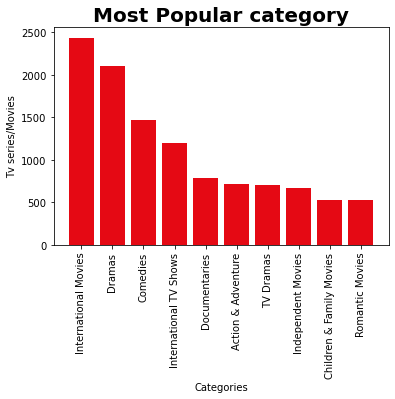

In [6]:
import matplotlib.pyplot as plt

height = list(categories_dict.values())[:10]
bars = list(categories_dict.keys())[:10]
y_pos = np.arange(len(bars))

plt.bar(y_pos, height,color = "#E50914")
plt.xlabel('Categories') 
plt.xticks(y_pos, bars)
plt.ylabel('Tv series/Movies') 
plt.title('Most Popular category',fontsize=20, fontweight='bold') 

plt.xticks(rotation=90)

# Show graphic
plt.show()

In [19]:
import datetime

def get_month(string_time):
    try:
        clean = string_time.strip()
        parsed = datetime.datetime.strptime(clean, '%B %d, %Y')
        #print(parsed)
        return int(parsed.month)

    except Exception as e:
        return e

In [20]:
netflix_df['date_added']

0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7782      October 19, 2020
7783         March 2, 2019
7784    September 25, 2020
7785      October 31, 2020
7786         March 1, 2020
Name: date_added, Length: 7787, dtype: object

In [21]:
netflix_df['added_month'] = netflix_df['date_added'].apply(
    get_month)
with_year = netflix_df[netflix_df['added_month'] != 0]

with_year
#netflix_df['added_month']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,10
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",9
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,10


[8, 12, 11, 1, 7, 6, 4, 10, 5, 3, 9, 2]
[833, 785, 757, 738, 669, 619, 618, 601, 600, 543, 542, 472]


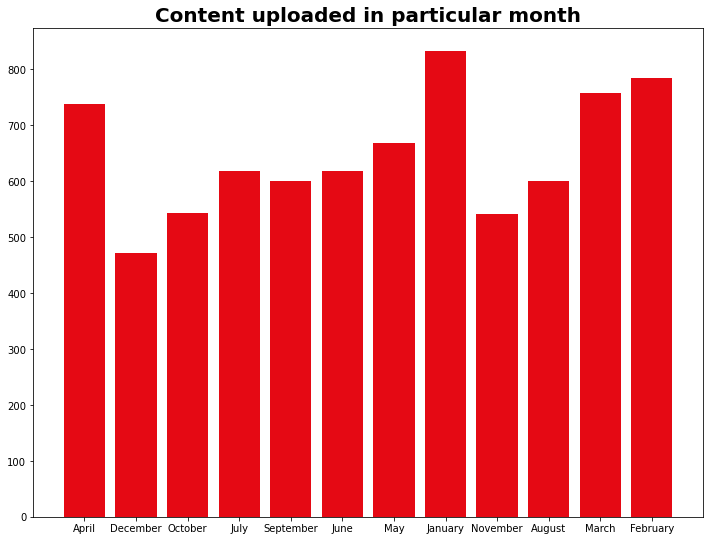

In [44]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)

bars = list(with_year.added_month.unique()[:12])
height = list(with_year.added_month.value_counts()[:12])
print(bars)
print(height)

plt.bar(bars, height, color = "#E50914" )
plt.xticks(bars, ('January', 'February', 'March', 'April',  'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'))
#plt.xticks.labels = ['January', 'February', 'March', 'April',  'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#bars = list()

plt.title('Content uploaded in particular month',fontsize=20, fontweight='bold') 
plt.show()